In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import io

In [ ]:
from google.colab import files
files.upload()

Saving train_labels.csv to train_labels.csv


{'train_labels.csv': b'building_id,damage_grade\n802906,3\n28830,2\n94947,3\n590882,2\n201944,3\n333020,2\n728451,3\n475515,1\n441126,2\n989500,1\n7962,3\n452227,2\n444381,2\n287845,3\n605134,3\n563431,2\n633759,2\n980230,3\n354011,2\n483543,3\n793397,2\n433870,2\n219578,2\n933368,2\n519606,2\n801078,3\n973909,2\n858160,2\n466558,2\n529366,3\n406413,2\n16485,2\n157370,2\n119565,2\n141871,3\n903120,3\n864809,1\n252816,3\n33651,3\n90130,2\n306024,2\n677028,2\n833827,3\n180267,2\n1005736,2\n440102,1\n132583,2\n362494,2\n987864,3\n402996,1\n871517,2\n877361,2\n605460,2\n288541,1\n893477,3\n135600,3\n987565,3\n552720,2\n624119,3\n302199,2\n961851,2\n1044113,2\n270811,2\n767109,3\n415067,2\n439999,2\n799678,2\n648002,2\n388581,3\n612701,3\n591993,3\n708530,2\n645774,3\n907445,2\n483230,2\n1041381,2\n425720,1\n426951,2\n732884,2\n206961,3\n529881,2\n118711,2\n965807,3\n928851,2\n603867,3\n67684,3\n361363,2\n645772,3\n931198,2\n250898,3\n351011,2\n852077,3\n262843,2\n311370,3\n722503,3\n551423

In [ ]:
dframe_Train=pd.read_csv('train_values.csv')
dframe_Test=pd.read_csv('test_values.csv')

In [ ]:
dframe_Test=pd.read_csv('test_values.csv')

In [ ]:
labels=pd.read_csv('train_labels.csv')

In [ ]:
labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [ ]:
dframe_Train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dframe_Train['damage_grade']=labels['damage_grade']

In [ ]:
dframe_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [ ]:
Cat_cols=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']

In [ ]:
dframe_Train[Cat_cols].nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
legal_ownership_status     4
dtype: int64

In [ ]:
dframe_Test[Cat_cols].head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,s,d,v
1,t,r,n,f,q,s,d,v
2,t,r,n,f,q,s,d,v
3,t,r,x,v,j,t,d,v
4,t,r,q,f,q,t,d,v


In [ ]:
dframe_Train[Cat_cols].head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v


In [ ]:
from sklearn.preprocessing import LabelEncoder 

Le=LabelEncoder()
dframe_Train['land_surface_condition']=Le.fit_transform(dframe_Train['land_surface_condition'])
dframe_Train['foundation_type']=Le.fit_transform(dframe_Train['foundation_type'])
dframe_Train['roof_type']=Le.fit_transform(dframe_Train['roof_type'])
dframe_Train['ground_floor_type']=Le.fit_transform(dframe_Train['ground_floor_type'])
dframe_Train['other_floor_type']=Le.fit_transform(dframe_Train['other_floor_type'])
dframe_Train['position']=Le.fit_transform(dframe_Train['position'])
dframe_Train['plan_configuration']=Le.fit_transform(dframe_Train['plan_configuration'])
dframe_Train['legal_ownership_status']=Le.fit_transform(dframe_Train['legal_ownership_status'])

In [ ]:
dframe_Test['land_surface_condition']=Le.fit_transform(dframe_Test['land_surface_condition'])
dframe_Test['foundation_type']=Le.fit_transform(dframe_Test['foundation_type'])
dframe_Test['roof_type']=Le.fit_transform(dframe_Test['roof_type'])
dframe_Test['ground_floor_type']=Le.fit_transform(dframe_Test['ground_floor_type'])
dframe_Test['other_floor_type']=Le.fit_transform(dframe_Test['other_floor_type'])
dframe_Test['position']=Le.fit_transform(dframe_Test['position'])
dframe_Test['plan_configuration']=Le.fit_transform(dframe_Test['plan_configuration'])
dframe_Test['legal_ownership_status']=Le.fit_transform(dframe_Test['legal_ownership_status'])

In [ ]:
dframe_Test[Cat_cols].nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
legal_ownership_status     4
dtype: int64

In [ ]:
del_cols=['building_id']
dframe_Train=dframe_Train.drop(labels=del_cols, axis=1)

In [ ]:
(dframe_Train.isnull().sum()/dframe_Train.shape[0])*100

geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber                 0.0
has_superstructure_bamboo         

In [ ]:
(dframe_Test.isnull().sum()/dframe_Train.shape[0])*100

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [ ]:
del_cols=['building_id']
dframe_Test=dframe_Test.drop(labels=del_cols, axis=1)

In [ ]:
dframe_Train.shape

(260601, 39)

In [ ]:
dframe_Test.shape

(86868, 39)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3d1ab6ef0>,
      dtype=object)

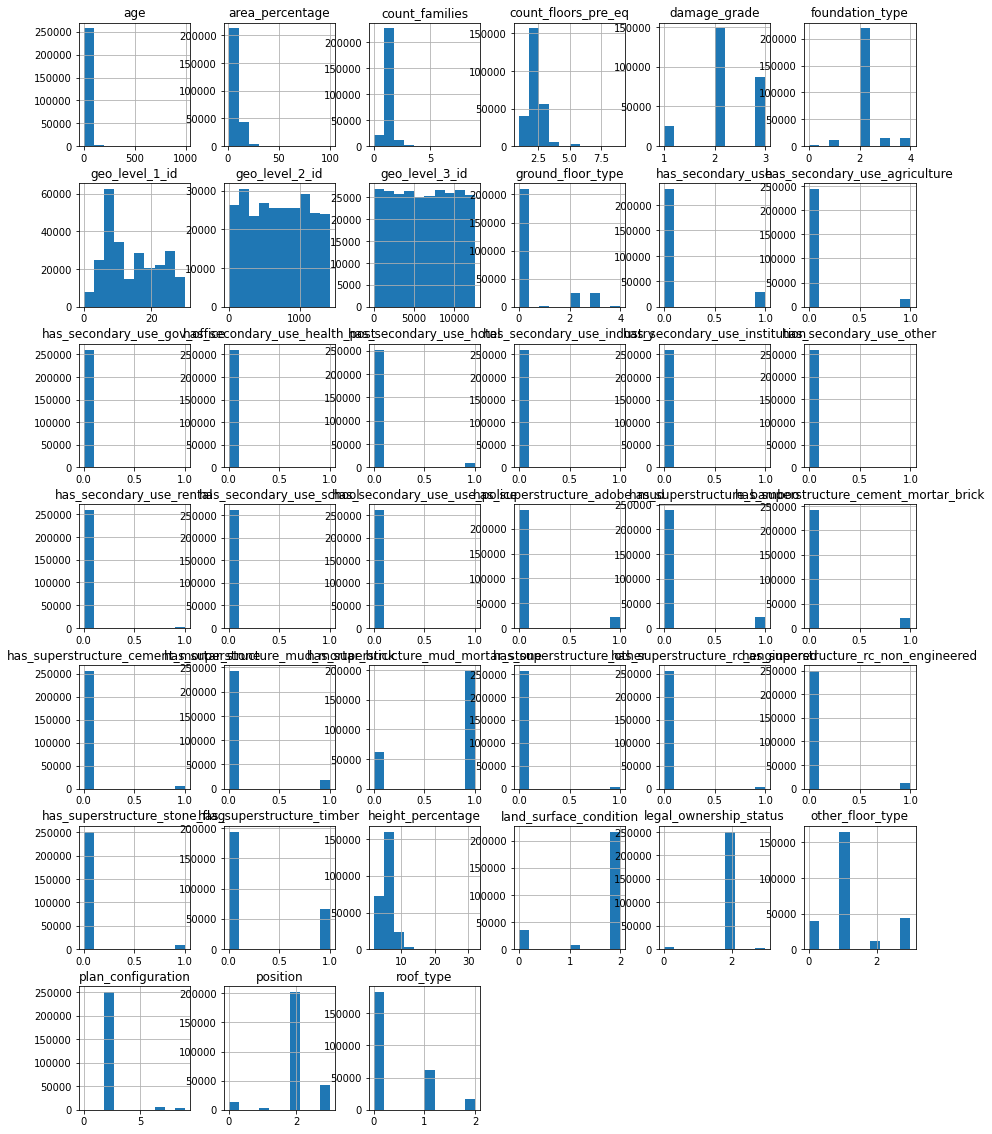

In [ ]:
dframe_Train.hist(figsize=(15,20))

In [ ]:
(dframe_Train.groupby('damage_grade').count()/dframe_Train.shape[0])*100

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792,9.640792
2,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186,56.891186
3,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022,33.468022


In [ ]:
dframe_Train.nunique()

geo_level_1_id                               31
geo_level_2_id                             1414
geo_level_3_id                            11595
count_floors_pre_eq                           9
age                                          42
area_percentage                              84
height_percentage                            27
land_surface_condition                        3
foundation_type                               5
roof_type                                     3
ground_floor_type                             5
other_floor_type                              4
position                                      4
plan_configuration                           10
has_superstructure_adobe_mud                  2
has_superstructure_mud_mortar_stone           2
has_superstructure_stone_flag                 2
has_superstructure_cement_mortar_stone        2
has_superstructure_mud_mortar_brick           2
has_superstructure_cement_mortar_brick        2
has_superstructure_timber               

In [ ]:
dframe_Train.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,1.695427,2.119036,0.360482,0.492481,1.226711,2.053718,2.215325,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,1.962318,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.696040,0.579154,0.595595,1.028436,0.902518,0.611996,1.118290,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.314817,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
dframe_Train.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [ ]:
selected_feat=['geo_level_1_id','count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','land_surface_condition', 'foundation_type', 'roof_type',
'ground_floor_type', 'other_floor_type', 'position','plan_configuration', 'has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered','has_superstructure_rc_engineered', 'has_superstructure_other',
'legal_ownership_status', 'count_families', 'has_secondary_use','has_secondary_use_agriculture', 'has_secondary_use_hotel',
'has_secondary_use_rental', 'has_secondary_use_institution','has_secondary_use_school', 'has_secondary_use_industry',
'has_secondary_use_health_post', 'has_secondary_use_gov_office','has_secondary_use_use_police', 'has_secondary_use_other',
]

Target=['damage_grade']

In [ ]:
X=dframe_Train[selected_feat].values
y=dframe_Train[Target].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
Mx=MinMaxScaler()
X=Mx.fit_transform(X)


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
Sx=StandardScaler()
X=Sx.fit_transform(X)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA=LinearDiscriminantAnalysis(n_components=2,solver='eigen')
X=LDA.fit(X,y).transform(X)

In [ ]:
dframe_Ml=pd.DataFrame(X, columns=['LDA-1','LDA-2'])

In [ ]:
finalDf = pd.concat([dframe_Ml, dframe_Train[Target]], axis = 1)

In [ ]:
finalDf.isnull().sum()

LDA-1           0
LDA-2           0
damage_grade    0
dtype: int64

In [ ]:
X=finalDf.iloc[:,:-1]
y=finalDf.iloc[:,-1]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
params={
          'depth':[3,1,2,6],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,2,10]
         }

In [ ]:
cat=CatBoostClassifier(depth=7,learning_rate=0.04,l2_leaf_reg=2,custom_metric='F1',iterations=3000)

In [ ]:
#Grid_search=GridSearchCV(cat,param_grid=params,n_jobs=-1,cv=10,verbose=3)

In [ ]:
cat.fit(X,y)

0:	learn: 1.0758909	total: 260ms	remaining: 13m 1s
1:	learn: 1.0552381	total: 460ms	remaining: 11m 29s
2:	learn: 1.0362694	total: 657ms	remaining: 10m 56s
3:	learn: 1.0185159	total: 847ms	remaining: 10m 34s
4:	learn: 1.0022001	total: 1.07s	remaining: 10m 41s
5:	learn: 0.9869632	total: 1.29s	remaining: 10m 44s
6:	learn: 0.9729949	total: 1.49s	remaining: 10m 36s
7:	learn: 0.9596770	total: 1.68s	remaining: 10m 29s
8:	learn: 0.9472833	total: 1.87s	remaining: 10m 20s
9:	learn: 0.9357832	total: 2.07s	remaining: 10m 19s
10:	learn: 0.9248222	total: 2.27s	remaining: 10m 16s
11:	learn: 0.9145111	total: 2.46s	remaining: 10m 11s
12:	learn: 0.9049416	total: 2.65s	remaining: 10m 9s
13:	learn: 0.8958562	total: 2.84s	remaining: 10m 5s
14:	learn: 0.8873971	total: 3.02s	remaining: 10m 1s
15:	learn: 0.8789725	total: 3.23s	remaining: 10m 2s
16:	learn: 0.8711343	total: 3.44s	remaining: 10m 3s
17:	learn: 0.8640466	total: 3.61s	remaining: 9m 58s
18:	learn: 0.8572932	total: 3.81s	remaining: 9m 58s
19:	learn: 

In [ ]:
predictions=cat.predict(X)
print(metrics.classification_report(y,predictions))
print(metrics.confusion_matrix(y,predictions))
print('Accuracy score',metrics.accuracy_score(y,predictions)) 
print('Accuracy score of F1 ',metrics.f1_score(y,predictions,average='micro'))

              precision    recall  f1-score   support

           1       0.72      0.47      0.57     25124
           2       0.72      0.85      0.78    148259
           3       0.73      0.58      0.65     87218

    accuracy                           0.72    260601
   macro avg       0.72      0.63      0.67    260601
weighted avg       0.72      0.72      0.71    260601

[[ 11924  12893    307]
 [  4185 125582  18492]
 [   351  36342  50525]]
Accuracy score 0.7215283133986439
Accuracy score of F1  0.7215283133986439


In [ ]:
dframe_Test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,2,2,2,2,0,3,2,0,0,0,0,0,1,0,0,0,0,0,2,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,2,2,1,0,1,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
X_test=dframe_Test[selected_feat].values
X_test=Mx.fit_transform(X_test)

In [ ]:
X_test=dframe_Test[selected_feat].values
X_test=Sx.fit_transform(X_test)

In [ ]:
predictions=cat.predict(X_test)

In [ ]:
sample_df=pd.DataFrame(dframe_Test,columns=['building_id'])
sample_df['damage_grade']=predictions

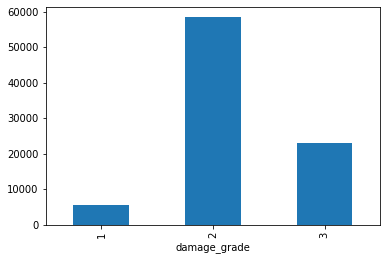

In [ ]:
sample_df.groupby('damage_grade').size().plot(kind='bar')

In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
sample_df.to_csv('data.csv',index=False)
!cp data.csv "drive/My Drive/"